Initiation

In [1]:
import psycopg2 as pg2
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
secret = 'password'

Import Database from PostgreSQL

In [3]:
conn = pg2.connect(database = 'sql-challenge',user='postgres',password=secret)
conn.autocommit = True
cur = conn.cursor()

Histogram for the most common salary ranges for Employees

In [4]:
cur.execute('SELECT * FROM salaries')
array = cur.fetchall()
data = pd.DataFrame(array, columns = ['emp_no', 'salary'])
data

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228
...,...,...
300019,499995,40000
300020,499996,58058
300021,499997,49597
300022,499998,40000


Bensford's Law Test

In [12]:
from benfordslaw import benfordslaw

In [22]:
df_sal = data["salary"]
df_sal = df_sal-df_sal.min()
df = df_sal.values
df

array([20117, 25828,     6, ...,  9597,     0, 23707], dtype=int64)

[benfordslaw] >Analyzing digit position: [1]
[benfordslaw] >[chi2] Anomaly detected! P=0, Tstat=12712.1


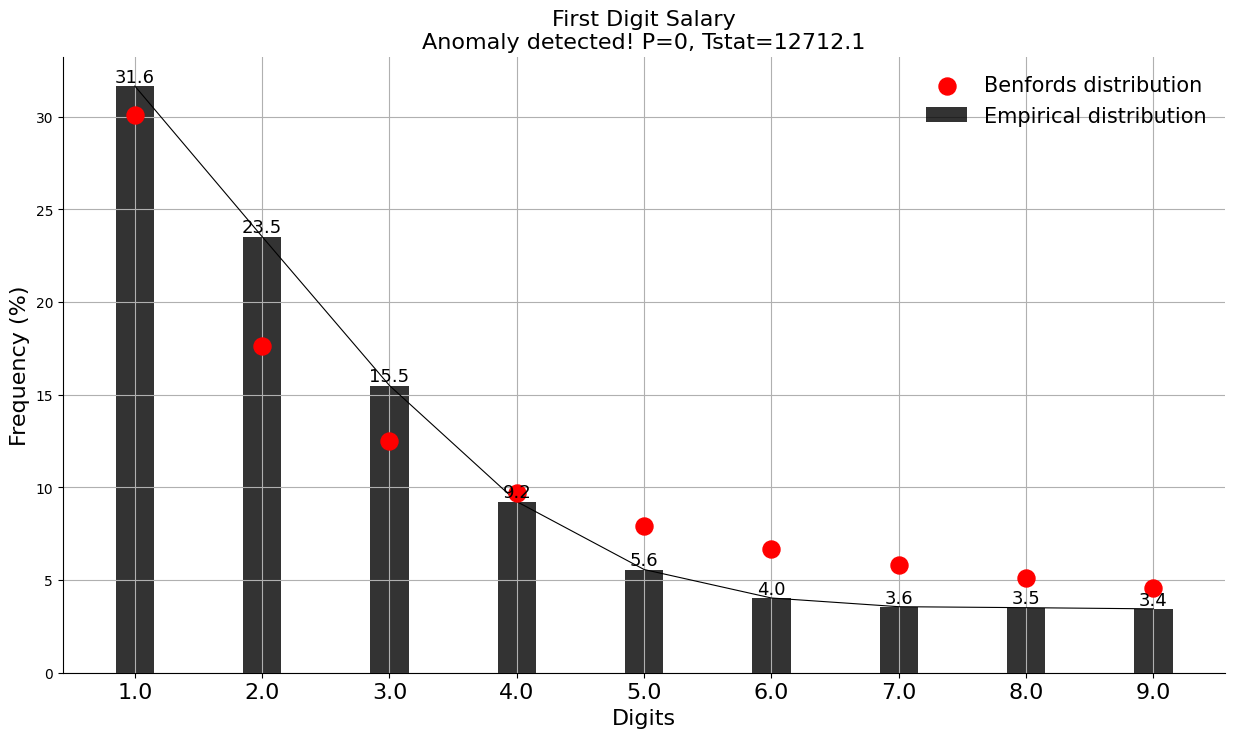

(<Figure size 1500x800 with 1 Axes>,
 <Axes: title={'center': 'First Digit Salary\nAnomaly detected! P=0, Tstat=12712.1'}, xlabel='Digits', ylabel='Frequency (%)'>)

In [25]:
bl = benfordslaw(pos=1,alpha=0.05)
res1 = bl.fit(df)
bl.plot(title='First Digit Salary')

[benfordslaw] >Analyzing digit position: [2]
[benfordslaw] >[chi2] Anomaly detected! P=4.55595e-20, Tstat=112.498


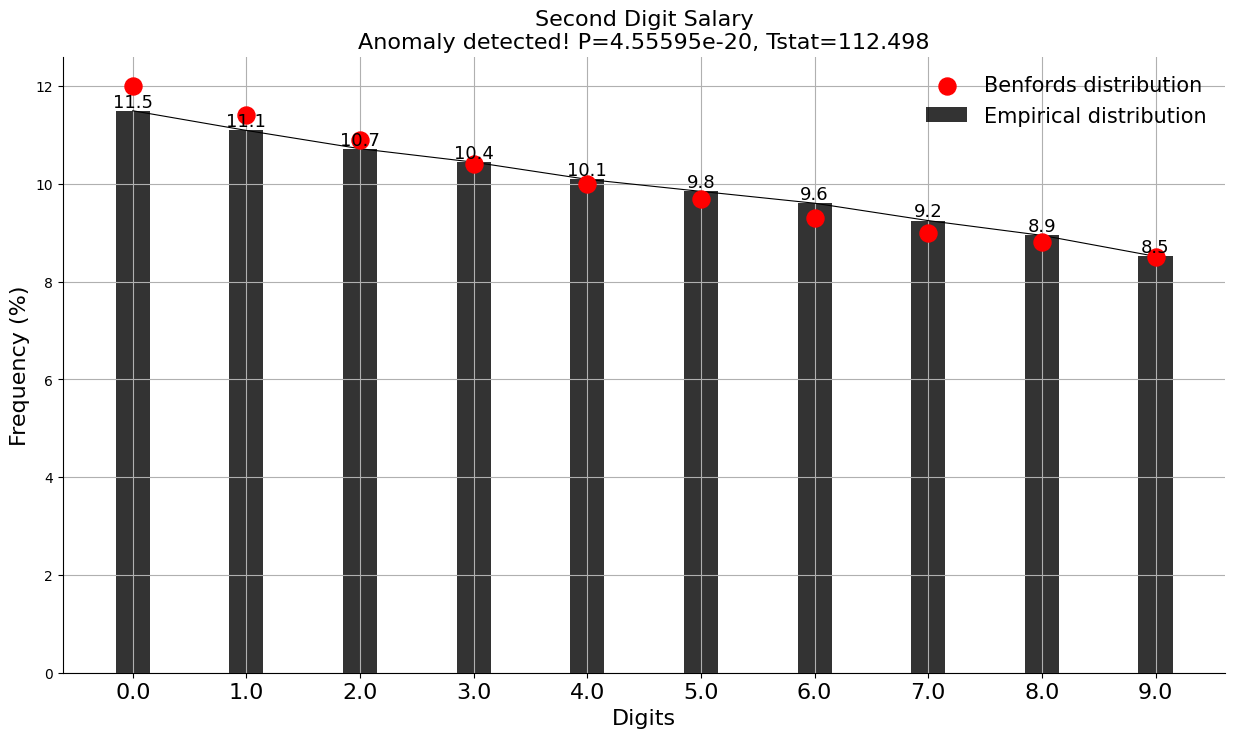

(<Figure size 1500x800 with 1 Axes>,
 <Axes: title={'center': 'Second Digit Salary\nAnomaly detected! P=4.55595e-20, Tstat=112.498'}, xlabel='Digits', ylabel='Frequency (%)'>)

In [28]:
bl = benfordslaw(pos=2,alpha=0.05)
res1 = bl.fit(df)
bl.plot(title='Second Digit Salary')

[benfordslaw] >Analyzing digit position: [-1]
[benfordslaw] >[chi2] Anomaly detected! P=0, Tstat=81915.8


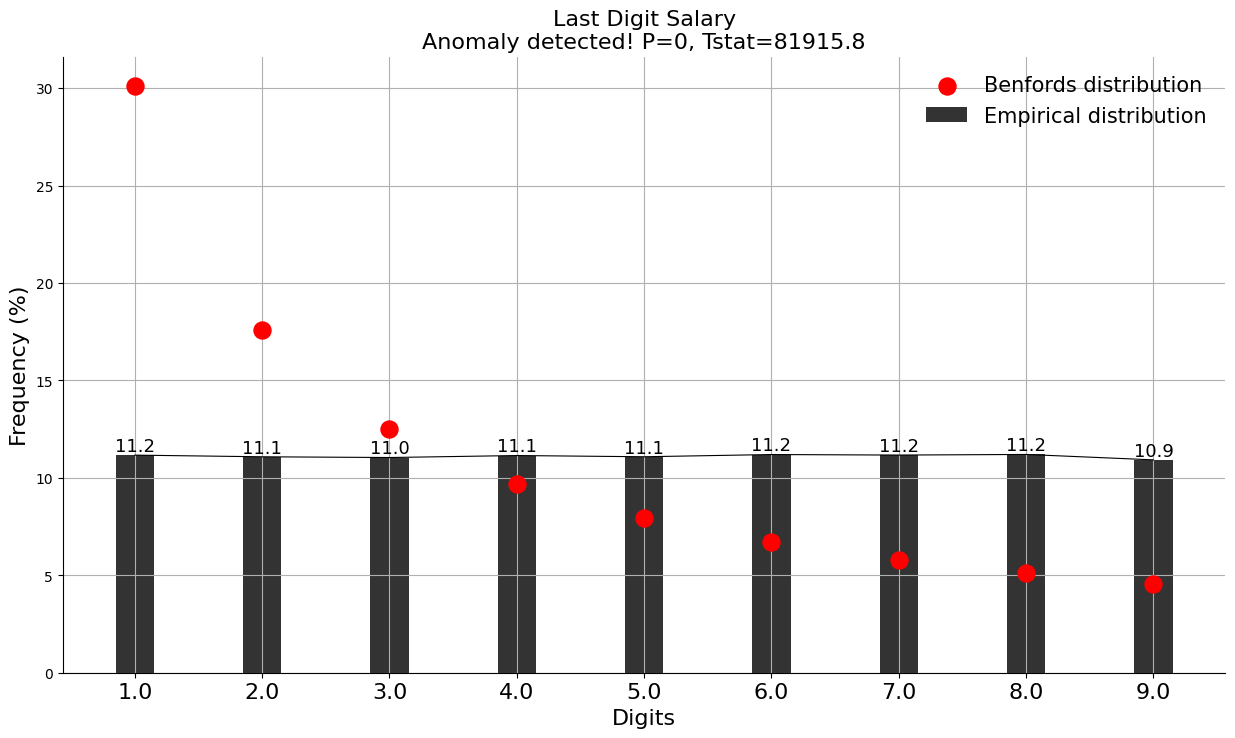

(<Figure size 1500x800 with 1 Axes>,
 <Axes: title={'center': 'Last Digit Salary\nAnomaly detected! P=0, Tstat=81915.8'}, xlabel='Digits', ylabel='Frequency (%)'>)

In [29]:
bl = benfordslaw(pos=-1,alpha=0.05)
res1 = bl.fit(df)
bl.plot(title='Last Digit Salary')

In [5]:
data['salary'].max()

129492

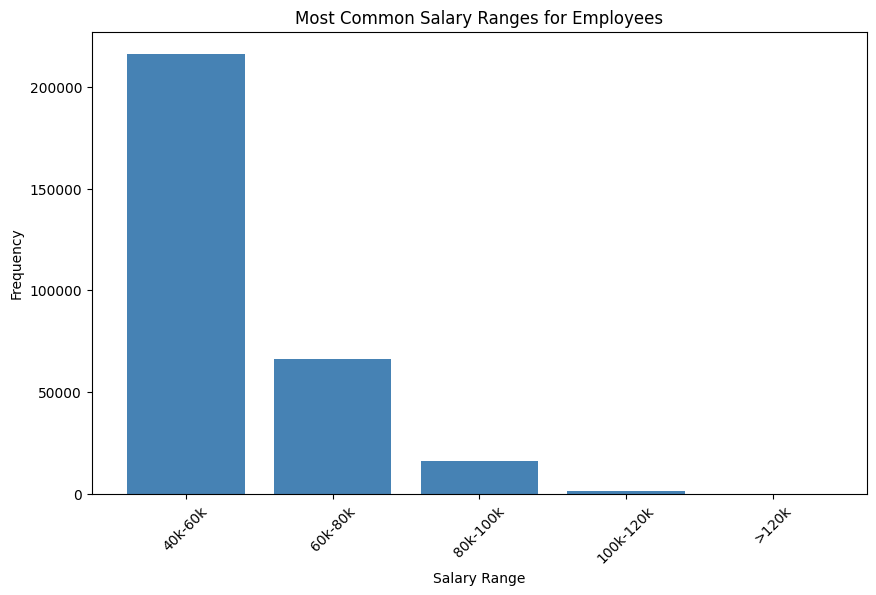

In [6]:
bins = [40000, 60000, 80000, 100000, 120000, 140000]
labels = ['40k-60k','60k-80k','80k-100k','100k-120k','>120k']
salary_ranges = pd.cut(data['salary'], bins=bins, labels=labels, right=False)
salary_counts = salary_ranges.value_counts().sort_index()

# Create the histogram
plt.figure(figsize=(10, 6))
plt.bar(salary_counts.index, salary_counts.values, color='steelblue')

# Customize the plot
plt.xlabel('Salary Range')
plt.ylabel('Frequency')
plt.title('Most Common Salary Ranges for Employees')
plt.xticks(rotation=45)

# Show the plot
plt.show()

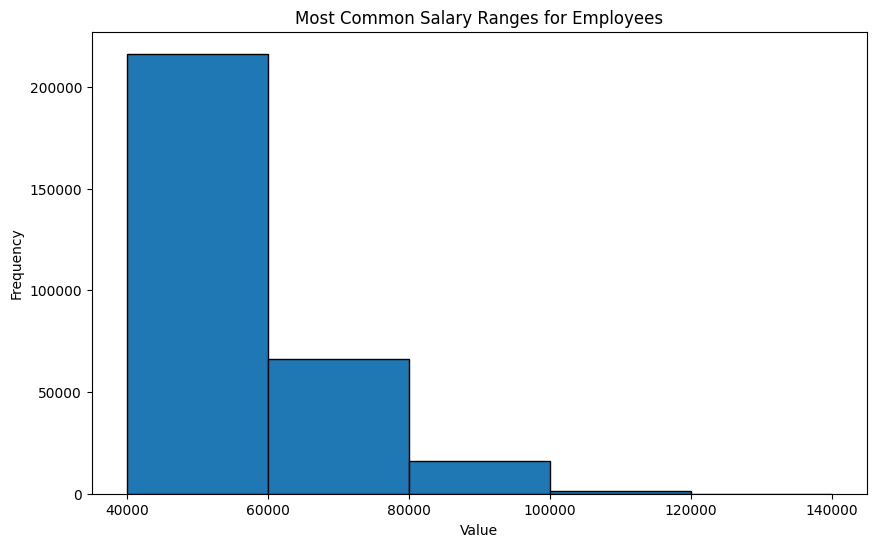

In [7]:
bins = [40000, 60000, 80000, 100000, 120000, 140000]
labels = ['40k-60k','60k-80k','80k-100k','100k-120k','>120k']
plt.figure(figsize=(10, 6))
plt.hist(data['salary'], bins=bins, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Most Common Salary Ranges for Employees')
plt.show()

Bar Chart of Average of Salary by Title

In [8]:
cur1 = conn.cursor()
cur1.execute(
    '''SELECT titles.title_id, titles.title AS Title, ROUND(AVG(salaries.salary),2) AS "Average Salary"
    FROM salaries
    INNER JOIN employees
    ON salaries.emp_no = employees.emp_no
    INNER JOIN titles
    ON titles.title_id = employees.emp_title_id
    GROUP BY titles.title_id'''
)
arr2 = cur1.fetchall()
data2 = pd.DataFrame(arr2, columns = ['title_id', 'Title', 'Average Salary'])
data2

,title_id,Title,Average Salary
0,e0001,Assistant Engineer,48564.43
1,e0002,Engineer,48535.34
2,e0003,Senior Engineer,48506.80
3,e0004,Technique Leader,48582.90
4,m0001,Manager,51531.04
5,s0001,Staff,58465.38
6,s0002,Senior Staff,58550.17


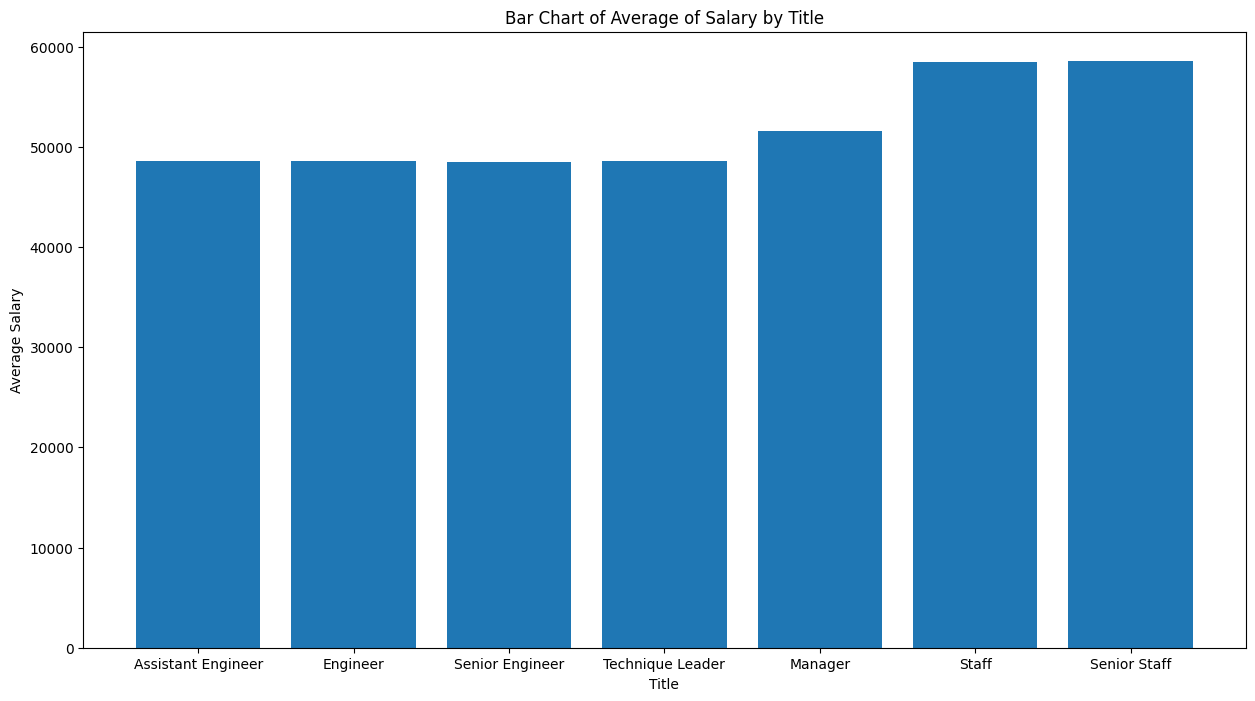

In [9]:
plt.figure(figsize=(15, 8 ))
plt.bar(data2['Title'], data2['Average Salary'])
plt.xlabel('Title')
plt.ylabel('Average Salary')
plt.title('Bar Chart of Average of Salary by Title')
plt.show()